In [2]:
from pandas_datareader import data as web
from pandas import read_csv
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from numpy import corrcoef, arange
from sklearn.preprocessing.data import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [3]:
def get_fx_data(currency_pairs):
    fx_data = web.get_data_fred(currency_pairs)
    print("Original Forex Data Shape", fx_data.shape)
    fx_data = fx_data.dropna()
    print("Cleansed Forex Data Shape", fx_data.shape)
    fx_data.to_csv("fred_clean.csv")
    return fx_data

In [4]:
def invert_rates(fx_data, currency_pairs):
    for pair in currency_pairs:
        fx_data["1/"+pair] = 1/fx_data[pair]
    fx_data = fx_data.drop(currency_pairs, axis=1)
    return fx_data

In [8]:
currency_pairs = [
    "DEXMXUS", # Mexico / US
    "DEXUSEU",
    "DEXCHUS",
    "DEXJPUS",
    "DEXCAUS",
    "DEXUSUK",
    "DEXUSAL",
    "DEXSZUS",
    "DEXUSNZ"
]
# fx_data = get_fx_data(currency_pairs)
# fx_data.to_csv("fred_clean.csv")
fx_data = read_csv("fred_clean.csv")
print("Cleansed Forex Data Shape", fx_data.shape)

Cleansed Forex Data Shape (1796, 10)


In [9]:
fx_data_dates = fx_data["DATE"]
fx_data_x = fx_data[currency_pairs]
fx_data_x = invert_rates(fx_data_x, ["DEXUSEU", "DEXUSUK", "DEXUSAL", "DEXUSNZ"])
ext_currency_pairs = fx_data_x.columns
print("Preprocessed Forex Data Shape", fx_data_x.shape)
pca = PCA()

fx_data_x_pc = pca.fit_transform(fx_data_x)

Preprocessed Forex Data Shape (1796, 9)


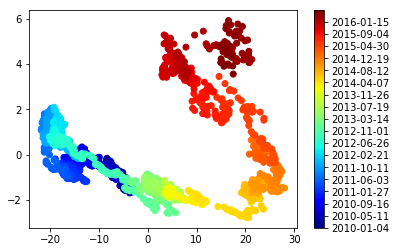

In [11]:
fig_1 = plt.figure(num=1)
cmap = plt.cm.get_cmap('jet')
c = arange(fx_data_x_pc.shape[0])
sc = plt.scatter(fx_data_x_pc[:, 0], fx_data_x_pc[:, 1], c=c, cmap=cmap)
cbar_ticks = arange(0, fx_data_x_pc.shape[0], fx_data_x_pc.shape[0]//20)
cbar = plt.colorbar(sc, ticks=range(0, fx_data_x_pc.shape[0], 100))
cbar.ax.set_yticklabels(fx_data_dates.iloc[cbar_ticks])

plt.show()

Principal components explained variance ratio [  6.58956366e-01   1.66406893e-01   1.42800756e-01   2.75122215e-02
   2.50538637e-03   1.43104084e-03   3.44613514e-04   4.27217061e-05
   5.79006067e-36]


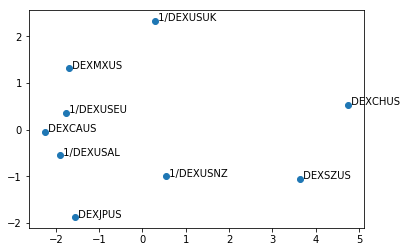

In [13]:
corr_matrix = corrcoef(fx_data_x.transpose())
#print(ext_currency_pairs, corr_matrix.shape)
#for pair, correlations in zip(ext_currency_pairs, corr_matrix):
#    print(pair, correlations)
corr_matrix_pc = pca.fit_transform(StandardScaler().fit_transform(corr_matrix))
#print("Principal components explained variance ratio", pca.explained_variance_ratio_)
fig_2 = plt.figure(num=2)
plt.scatter(corr_matrix_pc[:, 0], corr_matrix_pc[:, 1])
for i, annotation in enumerate(ext_currency_pairs):
    plt.annotate(" "+annotation, (corr_matrix_pc[i, 0], corr_matrix_pc[i, 1]))

plt.show()